# 코비 슛 성공 예측

### 데이터 로드

In [1]:
#https://www.kaggle.com/c/kobe-bryant-shot-selection/data
import pandas as pd

raw = pd.read_csv("data.csv")

In [2]:
raw.shape

(30697, 25)

In [3]:
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


## 데이터 살펴보기

In [5]:
raw.info()
# shot_made_flag        25697 non-null float64    cf) 30697 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [11]:
print(raw[raw.shot_made_flag.isnull()].shape)
raw[raw.shot_made_flag.isnull()].head()
# shot_made_flag   1 or 0  분류 문제
# NaN 은 답을 알 수 없기에 제외 필요함

(5000, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
16,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
19,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
32,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33


 - 데이터 제외하기: dropna  or isnull 활용

In [12]:
# data = raw.dropna(axis = 0, subset = ['shot_made_flag'])      # 'shot_made_flag  에 Nan 값이 있을 경우 해당 row 를  drop하라

# .isnull 을 이용해서 동일하게 만들 수 있음
data = raw[raw.shot_made_flag.isnull() == False]        

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

## 데이터살펴보기2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data.corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.005982,-0.059602,-0.029954,0.059602,-0.029954,-0.274276,0.955914,-0.007963,-0.018670,0.063295,-0.037232,NaN,0.025433
game_id,-0.005982,1.000000,0.011361,-0.012944,-0.011361,-0.012944,0.009581,0.005061,0.917898,-0.009029,-0.027247,-0.001612,NaN,0.761232
lat,-0.059602,0.011361,1.000000,0.017578,-1.000000,0.017578,0.077399,-0.039737,-0.000857,0.057766,-0.818124,0.148070,NaN,-0.033476
loc_x,-0.029954,-0.012944,0.017578,1.000000,-0.017578,1.000000,0.006624,-0.030059,-0.007751,0.001512,0.022307,-0.000848,NaN,-0.012453
loc_y,0.059602,-0.011361,-1.000000,-0.017578,1.000000,-0.017578,-0.077399,0.039737,0.000857,-0.057766,0.818124,-0.148070,NaN,0.033476
lon,-0.029954,-0.012944,0.017578,1.000000,-0.017578,1.000000,0.006624,-0.030059,-0.007751,0.001512,0.022307,-0.000848,NaN,-0.012453
minutes_remaining,-0.274276,0.009581,0.077399,0.006624,-0.077399,0.006624,1.000000,-0.047021,0.009583,0.024232,-0.064159,0.028342,NaN,-0.008251
period,0.955914,0.005061,-0.039737,-0.030059,0.039737,-0.030059,-0.047021,1.000000,0.003905,0.007153,0.047311,-0.032152,NaN,-0.003357
playoffs,-0.007963,0.917898,-0.000857,-0.007751,0.000857,-0.007751,0.009583,0.003905,1.000000,-0.005951,-0.007751,-0.001257,NaN,0.612991
seconds_remaining,-0.018670,-0.009029,0.057766,0.001512,-0.057766,0.001512,0.024232,0.007153,-0.005951,1.000000,-0.055875,0.030804,NaN,-0.004833


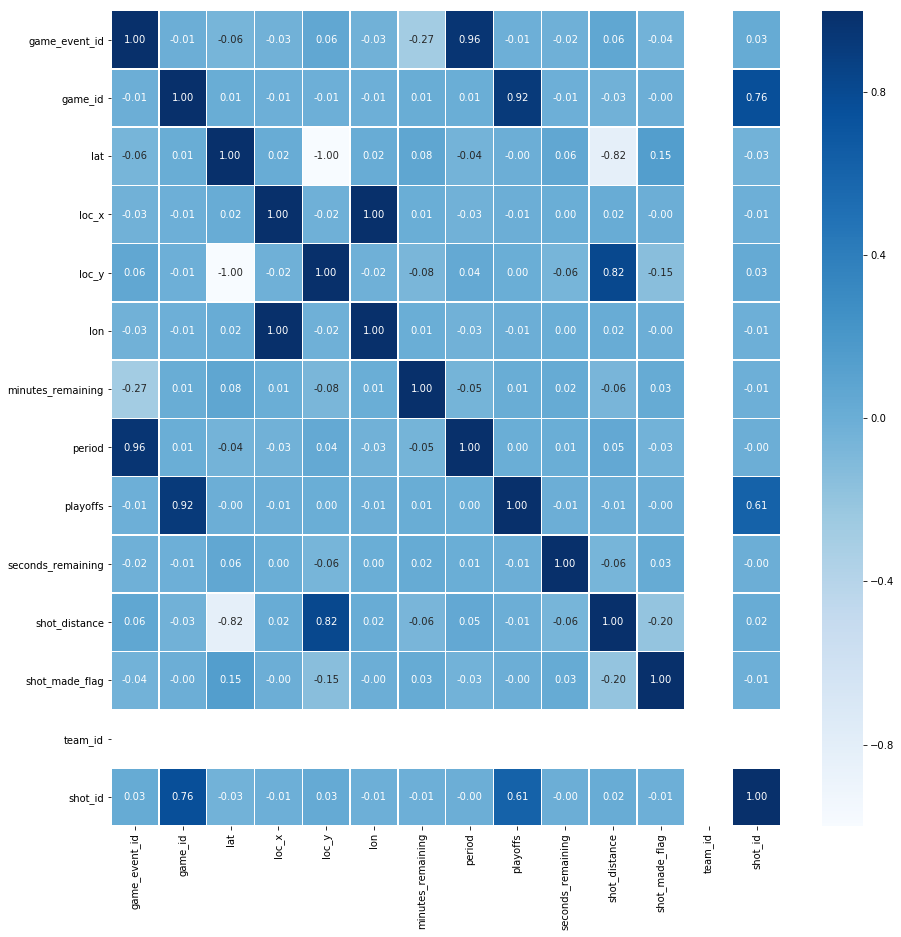

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

###  action_shot 데이터 살펴보기

In [ ]:
data.pivot('action_type','shot_made_flag',"count")

In [13]:
action_shots = []
for action in set(data.action_type):
    count_try = len(data[data.action_type == action])
    count_made = sum(data[data.action_type == action].shot_made_flag)
    made_percent = count_made / count_try
    action_shots.append((action, count_try, count_made, int(made_percent*1000)/10))

In [14]:
for shot in action_shots[:20]:
    print(shot)    # 슛 종류 , 슛 시도 횟수, 슛 성공횟수

('Alley Oop Dunk Shot', 95, 90.0, 94.7)
('Jump Bank Shot', 289, 224.0, 77.5)
('Tip Layup Shot', 2, 1.0, 50.0)
('Driving Dunk Shot', 257, 251.0, 97.6)
('Tip Shot', 151, 53.0, 35.0)
('Hook Bank Shot', 5, 5.0, 100.0)
('Pullup Jump shot', 402, 291.0, 72.3)
('Driving Bank shot', 3, 2.0, 66.6)
('Running Tip Shot', 1, 0.0, 0.0)
('Running Reverse Layup Shot', 7, 4.0, 57.1)
('Pullup Bank shot', 11, 6.0, 54.5)
('Running Layup Shot', 51, 36.0, 70.5)
('Fadeaway Bank shot', 27, 24.0, 88.8)
('Alley Oop Layup shot', 67, 48.0, 71.6)
('Running Slam Dunk Shot', 1, 1.0, 100.0)
('Floating Jump shot', 93, 67.0, 72.0)
('Running Jump Shot', 779, 582.0, 74.7)
('Driving Jump shot', 23, 10.0, 43.4)
('Turnaround Bank shot', 58, 46.0, 79.3)
('Turnaround Jump Shot', 891, 533.0, 59.8)


In [15]:
# # 성공률 순으로 살펴보기

# def cal_shot_success(x):
#     if x[2] == 0:
#         return 0
#     else:
#         return x[2]/x[1]
    

action_shots.sort(key = lambda x: x[3], reverse=True)     # 슛 성공횟수 많은 순으로 정렬


# # action_shots.sort(key = lambda x: x[1]/x[2], reverse=True)  # 슛 성공률 높은 순으로 정렬  0 이 나올 경우 계산 X
# action_shots.sort(key = lambda x: cal_shot_success(x), reverse=True)

In [16]:
for shot in action_shots[:20]:
    print(shot)    # 슛 종류 , 슛 시도 횟수, 슛 성공횟수

('Hook Bank Shot', 5, 5.0, 100.0)
('Running Slam Dunk Shot', 1, 1.0, 100.0)
('Driving Floating Bank Jump Shot', 1, 1.0, 100.0)
('Turnaround Finger Roll Shot', 2, 2.0, 100.0)
('Reverse Slam Dunk Shot', 15, 15.0, 100.0)
('Slam Dunk Shot', 334, 328.0, 98.2)
('Driving Dunk Shot', 257, 251.0, 97.6)
('Driving Slam Dunk Shot', 43, 42.0, 97.6)
('Alley Oop Dunk Shot', 95, 90.0, 94.7)
('Reverse Dunk Shot', 61, 56.0, 91.8)
('Follow Up Dunk Shot', 10, 9.0, 90.0)
('Fadeaway Bank shot', 27, 24.0, 88.8)
('Running Dunk Shot', 18, 16.0, 88.8)
('Driving Finger Roll Layup Shot', 59, 52.0, 88.1)
('Running Hook Shot', 33, 29.0, 87.8)
('Driving Finger Roll Shot', 68, 58.0, 85.2)
('Running Bank shot', 43, 36.0, 83.7)
('Finger Roll Layup Shot', 28, 23.0, 82.1)
('Turnaround Bank shot', 58, 46.0, 79.3)
('Dunk Shot', 217, 169.0, 77.8)


In [17]:
data_action_type = pd.DataFrame(action_shots, columns = ['action_type', 'try','made', 'per'])

In [18]:
data_action_type.head()

,action_type,try,made,per
0,Hook Bank Shot,5,5.0,100.0
1,Running Slam Dunk Shot,1,1.0,100.0
2,Driving Floating Bank Jump Shot,1,1.0,100.0
3,Turnaround Finger Roll Shot,2,2.0,100.0
4,Reverse Slam Dunk Shot,15,15.0,100.0


* pandas 활용해서 하기

In [14]:
data_action_try = data.groupby('action_type').shot_made_flag.count()

In [15]:
data_action_made = data.groupby('action_type').shot_made_flag.sum().astype('int64')

In [16]:
data_action_try

action_type
Alley Oop Dunk Shot                   95
Alley Oop Layup shot                  67
Cutting Layup Shot                     6
Driving Bank shot                      3
Driving Dunk Shot                    257
Driving Finger Roll Layup Shot        59
Driving Finger Roll Shot              68
Driving Floating Bank Jump Shot        1
Driving Floating Jump Shot             3
Driving Hook Shot                     13
Driving Jump shot                     23
Driving Layup Shot                  1628
Driving Reverse Layup Shot            83
Driving Slam Dunk Shot                43
Dunk Shot                            217
Fadeaway Bank shot                    27
Fadeaway Jump Shot                   872
Finger Roll Layup Shot                28
Finger Roll Shot                      26
Floating Jump shot                    93
Follow Up Dunk Shot                   10
Hook Bank Shot                         5
Hook Shot                             73
Jump Bank Shot                       289
Jump

In [17]:
data_action_made

action_type
Alley Oop Dunk Shot                  90
Alley Oop Layup shot                 48
Cutting Layup Shot                    4
Driving Bank shot                     2
Driving Dunk Shot                   251
Driving Finger Roll Layup Shot       52
Driving Finger Roll Shot             58
Driving Floating Bank Jump Shot       1
Driving Floating Jump Shot            1
Driving Hook Shot                     8
Driving Jump shot                    10
Driving Layup Shot                 1207
Driving Reverse Layup Shot           62
Driving Slam Dunk Shot               42
Dunk Shot                           169
Fadeaway Bank shot                   24
Fadeaway Jump Shot                  501
Finger Roll Layup Shot               23
Finger Roll Shot                     12
Floating Jump shot                   67
Follow Up Dunk Shot                   9
Hook Bank Shot                        5
Hook Shot                            27
Jump Bank Shot                      224
Jump Hook Shot              

In [18]:
data_action = pd.concat([data_action_try, data_action_made], axis=1)   #데이터 합치기

In [20]:
data_action.head()

,shot_made_flag,shot_made_flag
action_type,,
Alley Oop Dunk Shot,95,90
Alley Oop Layup shot,67,48
Cutting Layup Shot,6,4
Driving Bank shot,3,2
Driving Dunk Shot,257,251


In [21]:
data_action.columns = ['try','made']

In [22]:
data_action.head()

,try,made
action_type,,
Alley Oop Dunk Shot,95,90
Alley Oop Layup shot,67,48
Cutting Layup Shot,6,4
Driving Bank shot,3,2
Driving Dunk Shot,257,251


In [23]:
data_action['per'] = data_action['made']/data_action['try']

In [24]:
data_action.head()

,try,made,per
action_type,,,
Alley Oop Dunk Shot,95,90,0.947368
Alley Oop Layup shot,67,48,0.716418
Cutting Layup Shot,6,4,0.666667
Driving Bank shot,3,2,0.666667
Driving Dunk Shot,257,251,0.976654


In [25]:
max(data_action['try'])

15836

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

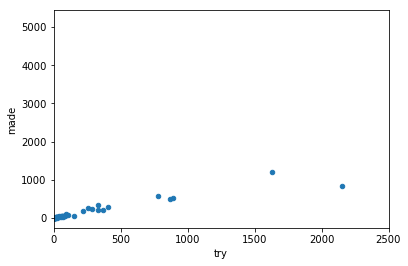

In [29]:
data_action.plot(kind = 'scatter', x='try', y = 'made', xlim =(0,2500))

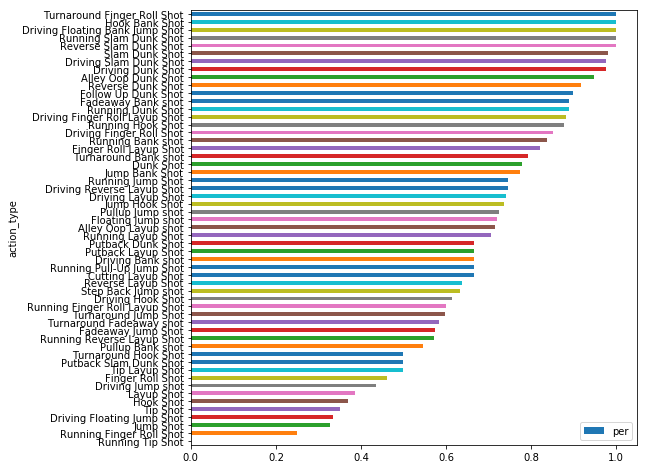

In [37]:
data_action.sort_values('per').plot(kind = 'barh', y = 'per', figsize = (8,8))

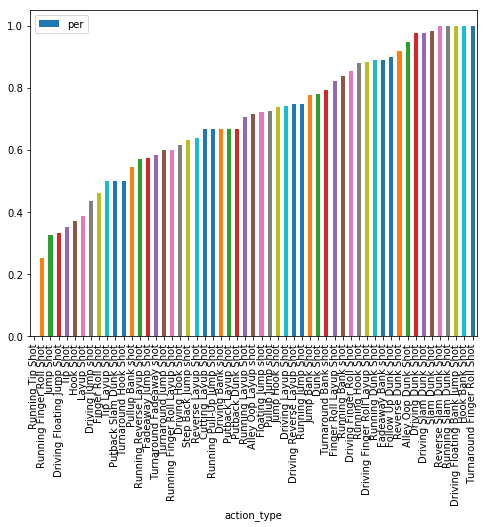

In [52]:
data_action.sort_values('per').plot(kind = 'bar', y = 'per', figsize = (8,6))
# sns.barplot(data = data_action.sort_values('per'), x=data_action.index,y='per')  #seaborn으로 그릴 경우

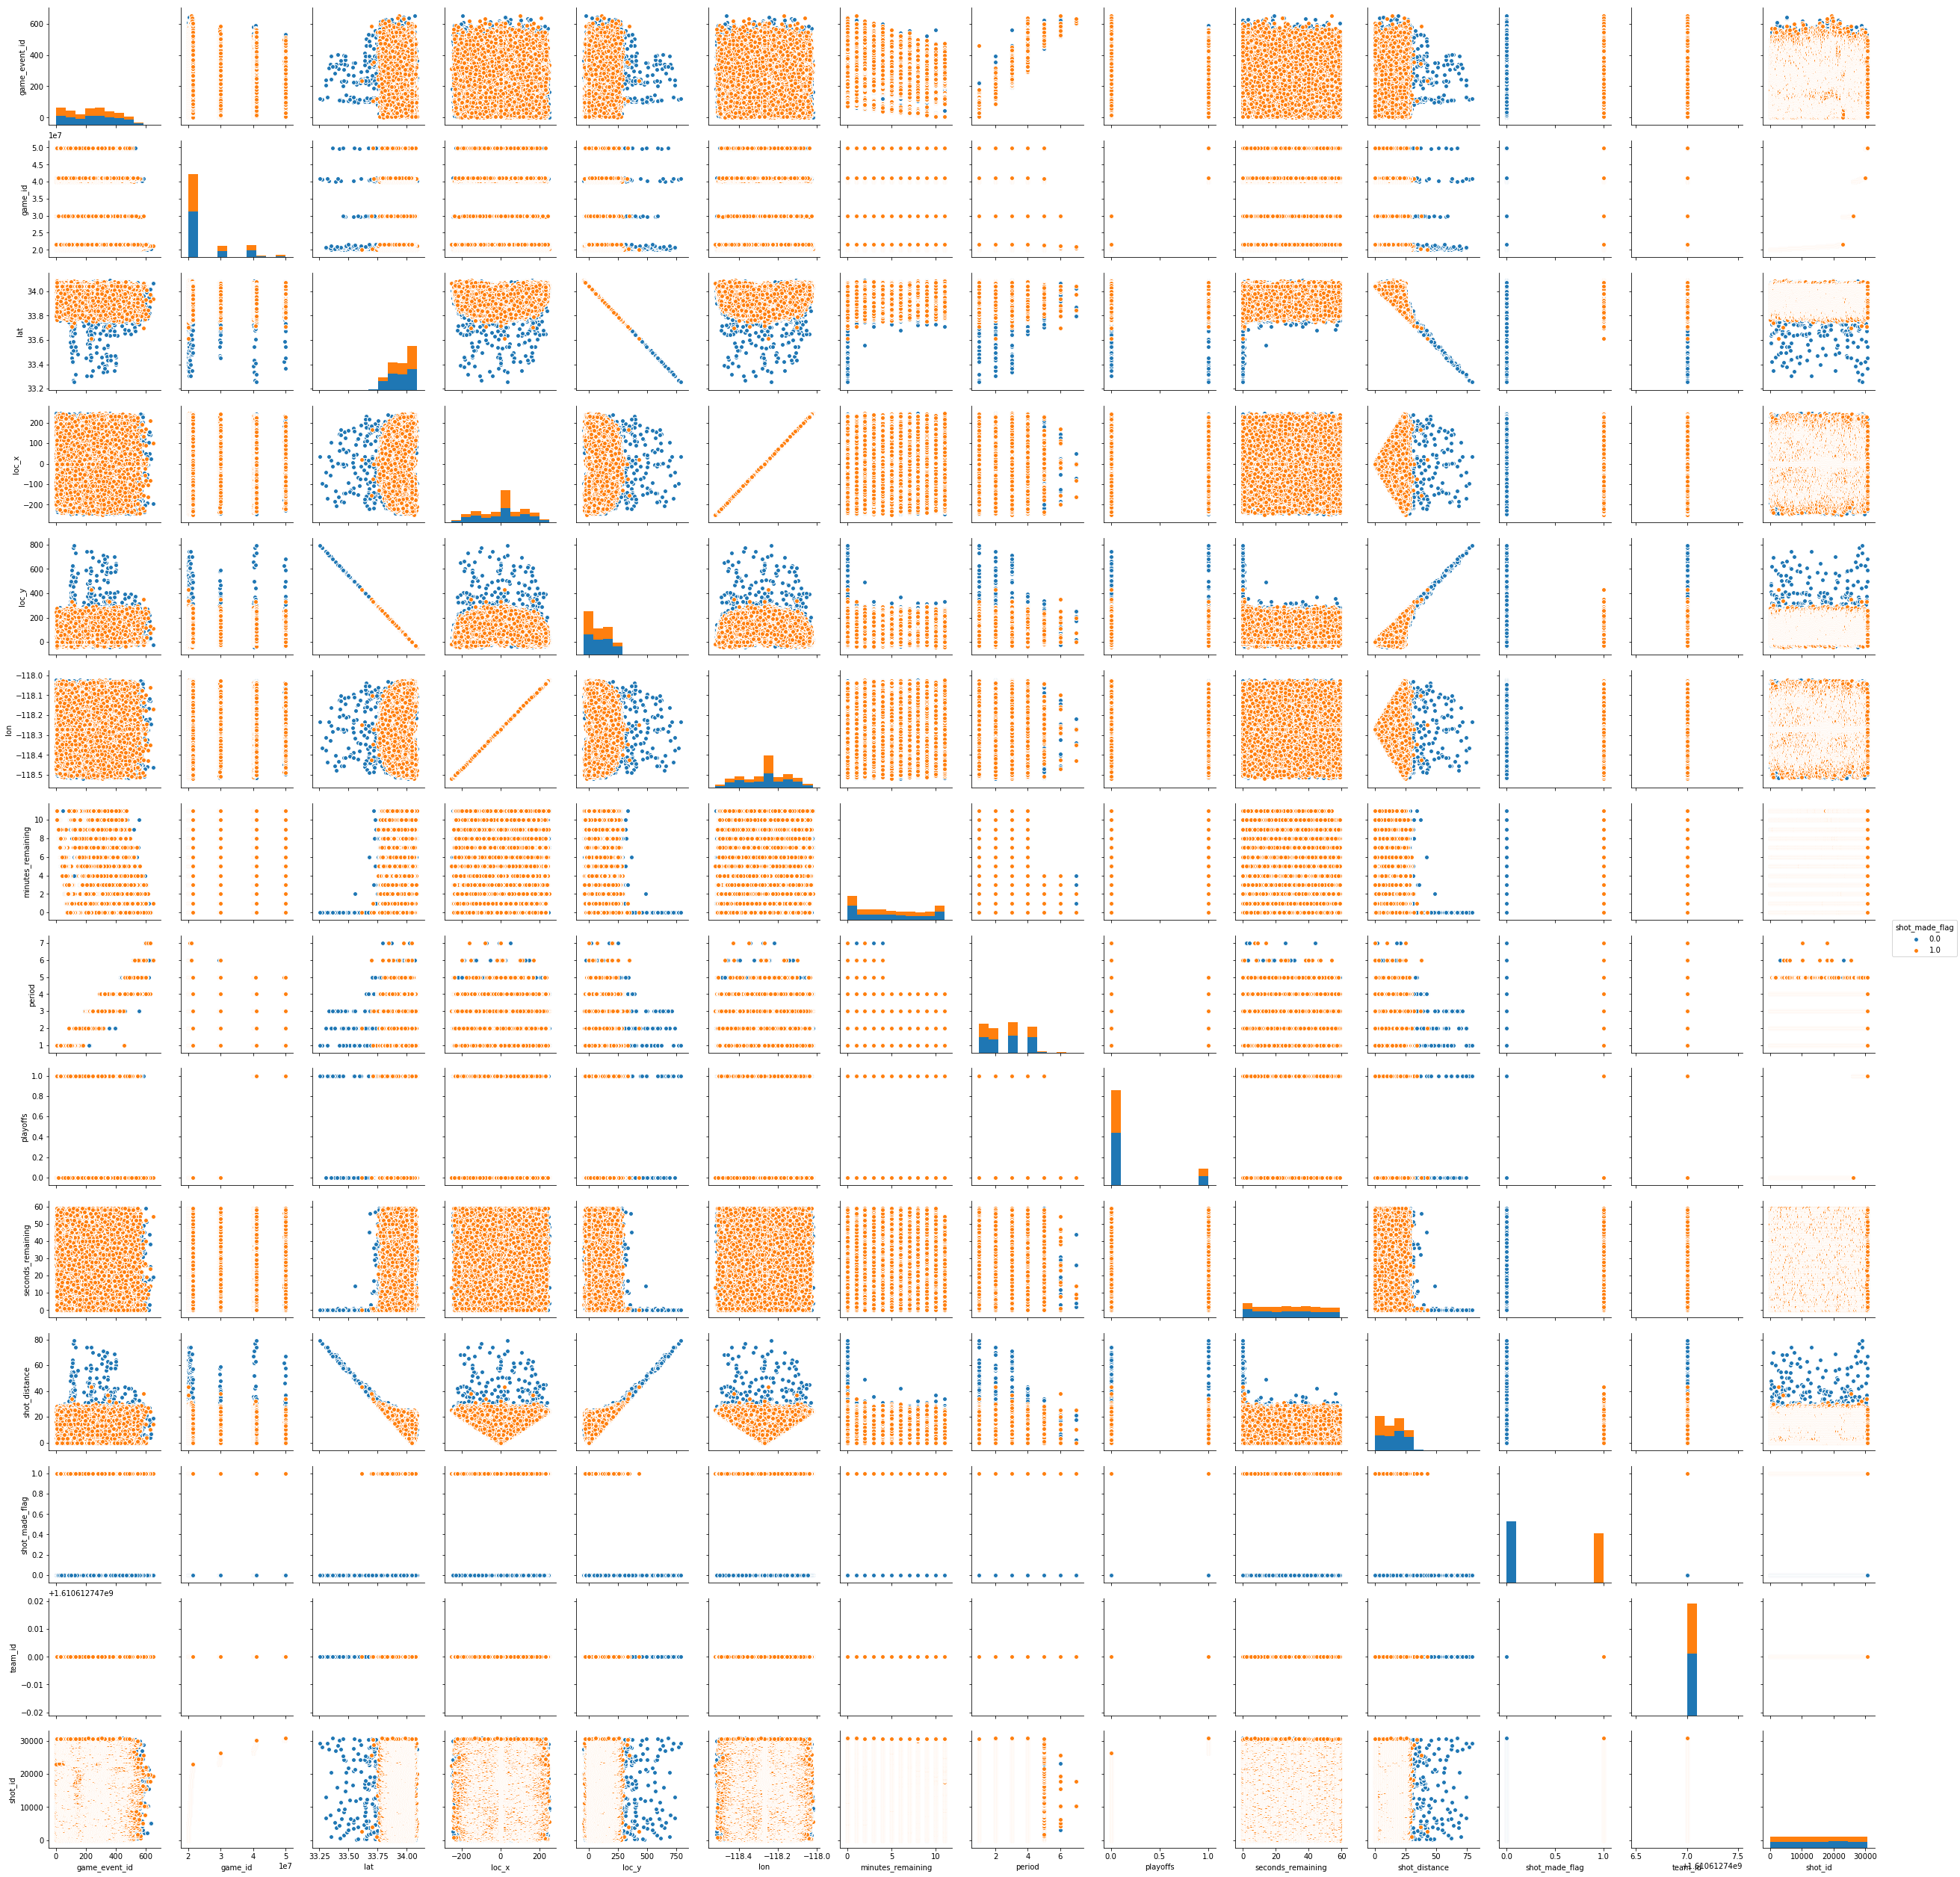

In [58]:
sns.pairplot(data, hue="shot_made_flag")

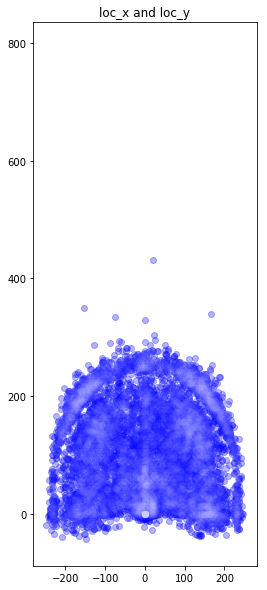

In [92]:
plt.figure(figsize=(4,10))

# 슛 성공
success = data[data.shot_made_flag == 1.0]
plt.scatter(x=success.loc_x, y=success.loc_y, color='blue', alpha=0.3)

# 슛 실패
fail = data[data.shot_made_flag == 0.0]
plt.scatter(x=fail.loc_x, y=fail.loc_y, color='white', alpha=0.02)

plt.title('loc_x and loc_y')

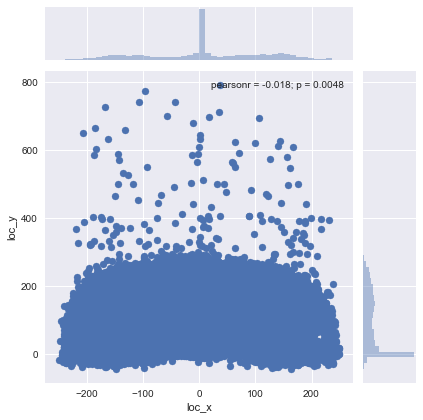

In [165]:
sns.jointplot(data=data, x="loc_x", y="loc_y")

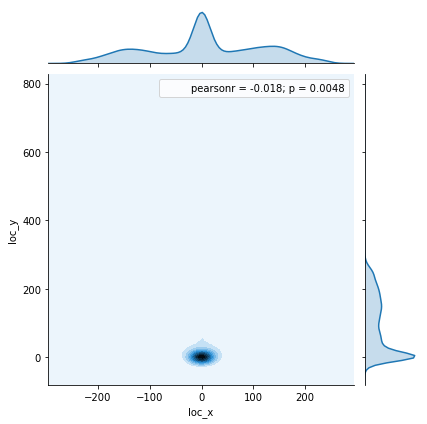

In [157]:
plt.figure(figsize=(4,10))
sns.jointplot(data=data, x="loc_x", y="loc_y", kind='kde')     #kde  는 누적

In [ ]:
##  pd.map 활용해서 계산하기

In [212]:
distance_map = data.groupby('shot_distance').mean()['shot_made_flag']
data['avg_by_distance'] = data['shot_distance'].map(distance_map)

C:\Users\amore\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [170]:
data['avg_by_distance'].head()

1    0.426955
2    0.390558
3    0.369527
4    0.634766
5    0.423937
Name: avg_by_distance, dtype: float64

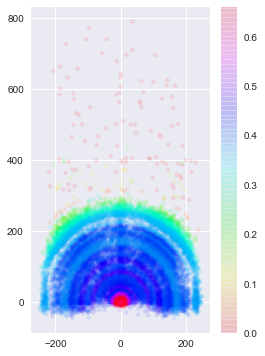

In [213]:
# 거리별 슛 시도 차트 / 색상은 성공률
plt.figure(figsize=(4,6))
plt.scatter(x=data['loc_x'],y=data['loc_y'],c=data['avg_by_distance'],s=20,cmap='hsv',alpha=0.1,edgecolors='none')
plt.colorbar()

In [180]:
action_map = data.groupby('action_type').mean().loc[:,'shot_made_flag']
data['avg_by_action'] = data.loc[:,'action_type'].map(action_map)

C:\Users\amore\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [203]:
data[['action_type','avg_by_action']].head()

,action_type,avg_by_action
1,Jump Shot,0.326913
2,Jump Shot,0.326913
3,Jump Shot,0.326913
4,Driving Dunk Shot,0.976654
5,Jump Shot,0.326913


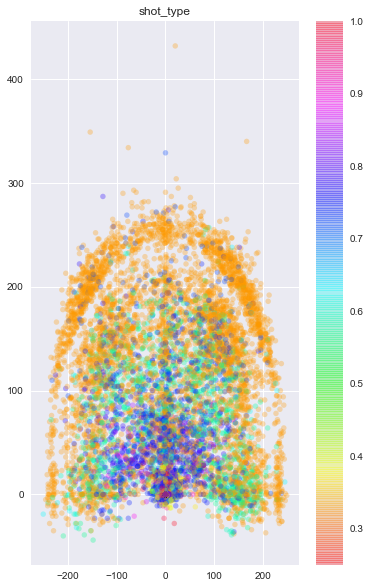

In [239]:
# 슛타입별 슛 성공 차트 / 색상은 성공률
plt.figure(figsize=(6,10))
success = data[data.shot_made_flag == 1.0]
plt.scatter(x=success['loc_x'],y=success['loc_y'],c=success['avg_by_action'],s=30, cmap='hsv',alpha=0.3,edgecolors='none')
plt.colorbar()
plt.title('shot_type')

In [ ]:
# 샷위치별 그래프( zone_area: 왼쪽/중앙/오른쪽,   shot_zone_basic : 미드레인지, 페인트존 안 등 ,  shot_zone_range: 거리)

In [232]:
data[['shot_zone_area','shot_zone_basic','shot_zone_range']].head(10)

,shot_zone_area,shot_zone_basic,shot_zone_range
1,Left Side(L),Mid-Range,8-16 ft.
2,Left Side Center(LC),Mid-Range,16-24 ft.
3,Right Side Center(RC),Mid-Range,16-24 ft.
4,Center(C),Restricted Area,Less Than 8 ft.
5,Left Side(L),Mid-Range,8-16 ft.
6,Center(C),Restricted Area,Less Than 8 ft.
8,Left Side(L),In The Paint (Non-RA),8-16 ft.
9,Center(C),In The Paint (Non-RA),8-16 ft.
10,Left Side Center(LC),Above the Break 3,24+ ft.
11,Right Side Center(RC),Mid-Range,16-24 ft.


In [233]:
set(data.shot_zone_basic)

{'Above the Break 3',
 'Backcourt',
 'In The Paint (Non-RA)',
 'Left Corner 3',
 'Mid-Range',
 'Restricted Area',
 'Right Corner 3'}

In [225]:
data['shot_zone_mix'] = data.shot_zone_area+data.shot_zone_basic+data.shot_zone_range

C:\Users\amore\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [227]:
data['shot_zone_mix'].head()

1              Left Side(L)Mid-Range8-16 ft.
2     Left Side Center(LC)Mid-Range16-24 ft.
3    Right Side Center(RC)Mid-Range16-24 ft.
4    Center(C)Restricted AreaLess Than 8 ft.
5              Left Side(L)Mid-Range8-16 ft.
Name: shot_zone_mix, dtype: object

In [228]:
zone_map = data.groupby(['shot_zone_mix']).mean().loc[:,'shot_made_flag']
data['avg_by_zone'] = data.loc[:,'shot_zone_mix'].map(zone_map)

C:\Users\amore\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


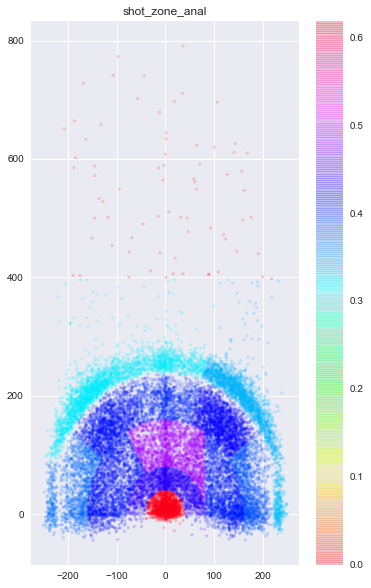

In [240]:
# 슛위치(왼쪽/오른쪽/zone) 슛 성공 차트 / 색상은 성공률
plt.figure(figsize=(6,10))
plt.scatter(x=data['loc_x'],y=data['loc_y'],c=data['avg_by_zone'],s=10, cmap='hsv',alpha=0.2,edgecolors='none')
plt.colorbar()
plt.title('shot_zone_anal')

# 골밑보다는 자유투 근처
# 골대 바라봤을때 왼쪽에서 슛 하는 것이 확률 더 높음(esp.3점)

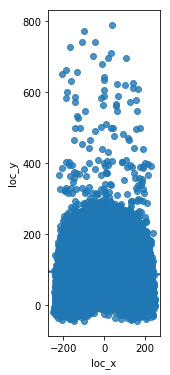

In [66]:
plt.figure(figsize=(2,6))
sns.regplot(x=data.loc_x , y=data.loc_y)

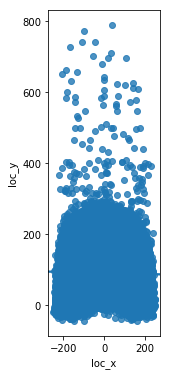

In [68]:
plt.figure(figsize=(2,6))
sns.regplot(x=data.loc_x , y=data.loc_y, scatter = True)

### 데이터정리(불필요한 데이터 제거)

In [140]:
data_x=data[['action_type', 'loc_x', 'loc_y','shot_distance']]
data_y=data['shot_made_flag']

In [141]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 4 columns):
action_type      25697 non-null object
loc_x            25697 non-null int64
loc_y            25697 non-null int64
shot_distance    25697 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.2+ MB


In [142]:
data_x = pd.get_dummies(data_x, drop_first=True)


In [143]:
data_x.head()

,loc_x,loc_y,shot_distance,action_type_Alley Oop Layup shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Floating Bank Jump Shot,...,action_type_Running Tip Shot,action_type_Slam Dunk Shot,action_type_Step Back Jump shot,action_type_Tip Layup Shot,action_type_Tip Shot,action_type_Turnaround Bank shot,action_type_Turnaround Fadeaway shot,action_type_Turnaround Finger Roll Shot,action_type_Turnaround Hook Shot,action_type_Turnaround Jump Shot
1,-157,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-101,135,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,138,175,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-145,-11,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [144]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(data_x, data_y) # train , test 비율을 3:1 비율로 나누어 줍니다.

In [145]:
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.614785992218
리포트 =
              precision    recall  f1-score   support

        0.0       0.64      0.70      0.67      3552
        1.0       0.58      0.51      0.54      2873

avg / total       0.61      0.61      0.61      6425



In [147]:
ifs = clf.feature_importances_  # feature(변수) 별 중요도 계산

factor_check ={}
for i, score in enumerate(ifs):
#     print('{} : {}'.format(data_x.columns.values[i] , score))
    factor_check[data_x.columns.values[i]]=score
print(factor_check)    

{'loc_x': 0.39833651187965857, 'action_type_Tip Shot': 0.0035688775350722866, 'action_type_Jump Shot': 0.032257426298144223, 'action_type_Driving Floating Bank Jump Shot': 5.4474314689352627e-05, 'action_type_Fadeaway Jump Shot': 0.0053496746639955335, 'action_type_Jump Bank Shot': 0.0042461307560180805, 'action_type_Fadeaway Bank shot': 0.00074803245702606221, 'action_type_Driving Hook Shot': 0.00038176802725949517, 'action_type_Turnaround Jump Shot': 0.0048985792390451068, 'action_type_Driving Reverse Layup Shot': 0.0010098560631196078, 'action_type_Putback Slam Dunk Shot': 0.00010876336220228696, 'action_type_Running Tip Shot': 0.0002210456399018945, 'action_type_Pullup Jump shot': 0.0052485130922722643, 'action_type_Driving Dunk Shot': 0.007345525631138777, 'action_type_Finger Roll Layup Shot': 0.00052531857792568863, 'action_type_Turnaround Finger Roll Shot': 4.757420564989745e-05, 'action_type_Turnaround Fadeaway shot': 0.0025084265519961521, 'action_type_Running Bank shot': 0.00

In [148]:
sorted_factor = sorted(factor_check.items(), key=lambda x:x[1], reverse=True)  # 중요도 순으로 정렬하기

In [149]:
from pprint import pprint  # 프린트 예쁘게 (줄바꿈 같은거...)
pprint(sorted_factor[:20])

[('loc_x', 0.39833651187965857),
 ('loc_y', 0.35896266498258311),
 ('shot_distance', 0.10210571601073645),
 ('action_type_Jump Shot', 0.032257426298144223),
 ('action_type_Layup Shot', 0.020265801883927827),
 ('action_type_Running Jump Shot', 0.012691012267208429),
 ('action_type_Driving Layup Shot', 0.011503232738265647),
 ('action_type_Driving Dunk Shot', 0.007345525631138777),
 ('action_type_Slam Dunk Shot', 0.006582855010612937),
 ('action_type_Fadeaway Jump Shot', 0.0053496746639955335),
 ('action_type_Pullup Jump shot', 0.0052485130922722643),
 ('action_type_Turnaround Jump Shot', 0.0048985792390451068),
 ('action_type_Jump Bank Shot', 0.0042461307560180805),
 ('action_type_Tip Shot', 0.0035688775350722866),
 ('action_type_Turnaround Fadeaway shot', 0.0025084265519961521),
 ('action_type_Dunk Shot', 0.0022510978676947404),
 ('action_type_Driving Finger Roll Layup Shot', 0.0019487323831787755),
 ('action_type_Reverse Layup Shot', 0.0018251965656617317),
 ('action_type_Hook Shot', 